<a href="https://colab.research.google.com/github/ArslanUllahKhan1/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Email Campaign Effectiveness Prediction**
###**Problem Statement**
Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.

###**Objective**
The objective of this project is to provide marketers who are regularly authoring email marketing campaigns with a thorough understanding of what we’re doing, so they too can leverage the machine learning models to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.



###**Data Description**
The data has the following features:

**Email_ID** — This column contains the email ids of individuals.

**Email_type** — Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.

**Subject_Hotness_Score** — It is the email effectiveness score.

**Email_Source** — It represents the source of the email like sales or marketing or product type email.

**Email_Campaign_Type** — Campaign type

**Total_Past_Communications** — This column contains the previous mails from the same source.

**Customer_Location** — Categorical data which explains the different demographics of the customers.

**Time_Email_sent_Category** — It has 3 categories 1,2 and 3 which may give us morning,evening and night time slots.

**Word_Count** — It contains the no.of words contained in the mail.

**Total_Links** — Total links from the mail.

**Total_Images** — The banner images from the promotional email.

**Email_Status** — It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

In [84]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#Reading the CSV file
email_df = pd.read_csv("/content/drive/MyDrive/Classification Data Sets/Copy of data_email_campaign.csv")

In [87]:
# Getting the shape of the data
email_df.shape

(68353, 12)

In [88]:
# Getting a glimpse of the data
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [89]:
#Description of dataset 
email_df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


##**Exploratory Data Analysis**

In [90]:
#Getting info
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [91]:
#Checking Null values
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64


We have 4 features that contains have null values.

Customer_Location is having 11595 null values

Total_Past_Communications is having 6825 null values

Total_Links is having 2201 null values

Total_Images is having 1677 null values


##Null Values Treatment

### Treating the Customer Location 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


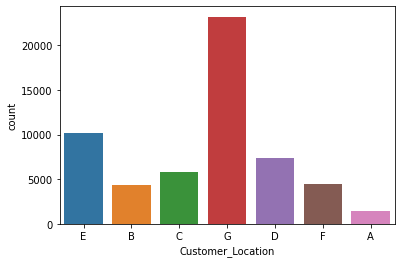

In [92]:
#Visualizing Customer_Location
sns.countplot(email_df['Customer_Location'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text major ticklabel objects>)

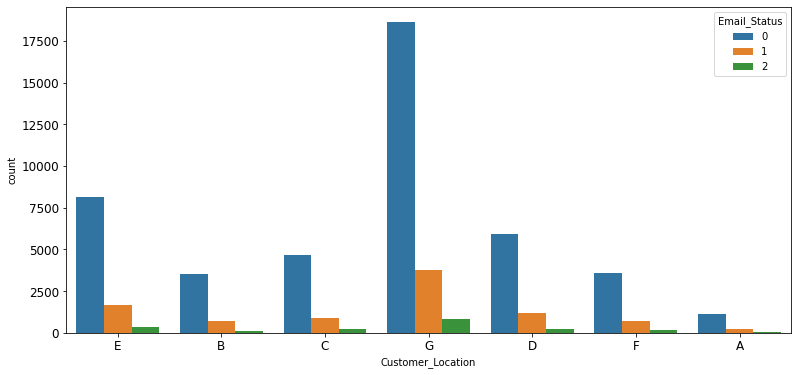

In [93]:
plt.figure(figsize=(13,6))
ax=sns.countplot(email_df['Customer_Location'],hue=email_df['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)

As we can see irrespective of location the ratio of Email_Status is same throughout .So we can drop the location column

In [94]:
email_df.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)

Shape of data after dropping  (68353, 11)


###Now Total_Past_Communications

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


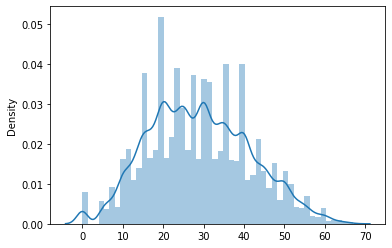

In [95]:
#let's see the distribution of Total Past Communications
sns.distplot(x=email_df['Total_Past_Communications'], hist = True)

####Since we have kind of normal distribution, we will use mean to fill up the null values in this column

In [96]:
#filling up the null values for Total_Past_Communications
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace = True)

### Filling missing values of Total_Links column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


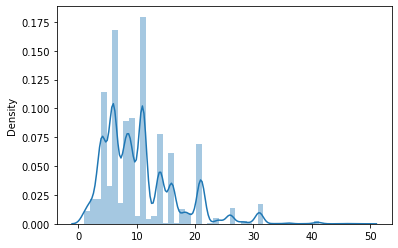

In [97]:
#let's see the distribution of Total Links
sns.distplot(x=email_df['Total_Links'], hist= True)

Total Links column distribution is skewed on the right. So we use mode to fill these null values.

In [98]:
#filling up the Total Links Column
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0], inplace = True)

### Lastly Total_Images Column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


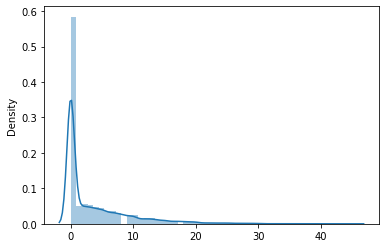

In [99]:
#let's see the distribution of Total Images
sns.distplot(x=email_df['Total_Images'], hist= True)

The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [100]:
#filling up the Total Images Column
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace = True)

In [101]:
#check for duplicates
email_df.duplicated().sum()

0

##Visualizations :

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Types bar plot')

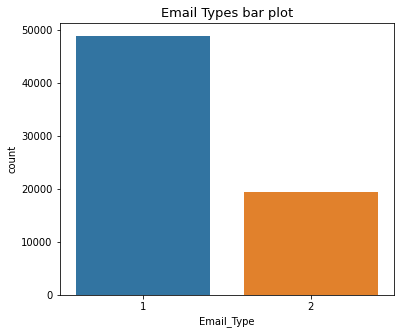

In [102]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,5))
sns.countplot(email_df['Email_Type'])
plt.title('Email Types bar plot', fontsize=13)

**Inference** : Most of the emails were of type 1.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subject Hotness Score')

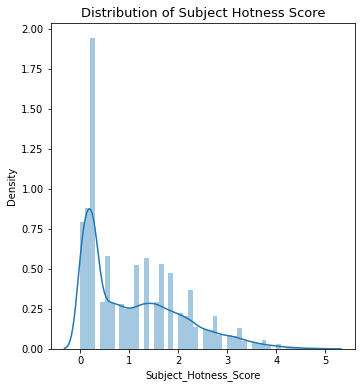

In [103]:
# Plotting histogram for Subject_Hotness_Score
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Subject_Hotness_Score'])
plt.title('Distribution of Subject Hotness Score', fontsize=13)


Inference : Emails with lower subject hotness score are higher in numbers.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


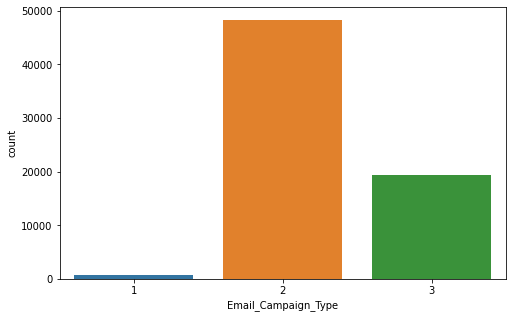

In [104]:
# Plotting bar plot for Email_Campaign_Type
plt.figure(figsize=(8,5))
sns.countplot(email_df['Email_Campaign_Type'])

Inference :2nd type campaign have higher number of mails as compared to other types.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Source Types bar plot')

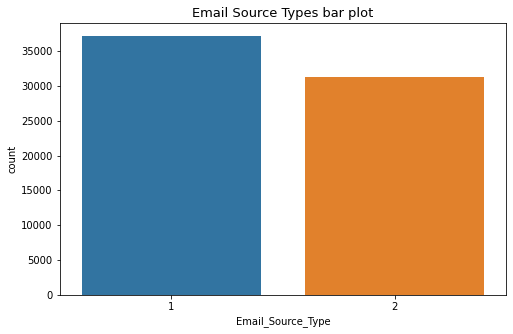

In [105]:
# Plotting bar plot for Email_Source_Type
plt.figure(figsize=(8,5))
sns.countplot(email_df['Email_Source_Type'])
plt.title('Email Source Types bar plot', fontsize=13)

Inference : Emails were sent from both the sources with almost equal probability.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Past Communications happened')

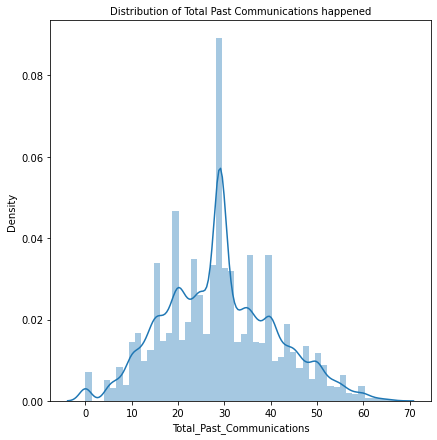

In [106]:
# Plotting histogram for Total_Past_Communications
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(email_df['Total_Past_Communications'])
plt.title('Distribution of Total Past Communications happened', fontsize=10)


Inference- Number of Total Past Communications is somehow normally distributed and average number of communications are around 30.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


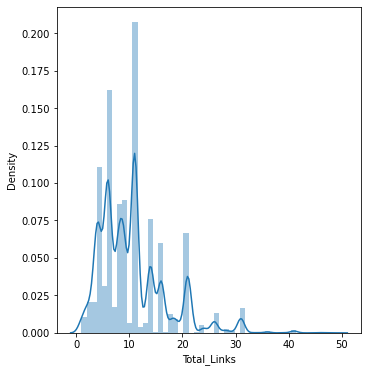

In [107]:
# Plotting histogram for Total_Links
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Total_Links'])

In [108]:
#Checking average number of links in an email
print(f"Average number of links in an email : {email_df['Total_Links'].mean()}")

Average number of links in an email : 10.447895483738826


Inference-Total link numbers has no distinct distribution. Emails have mean number of links around 10

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


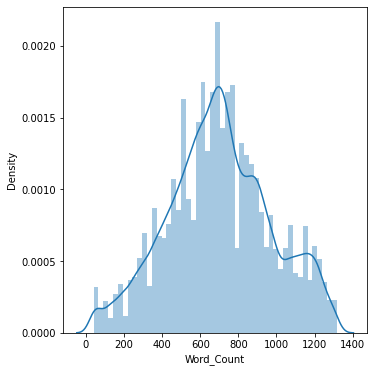

In [109]:
# Plotting histogram for Word_Count
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Word_Count'])

Inference : As we can see email word counts is somehow normally distributed with average number of words around 700.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


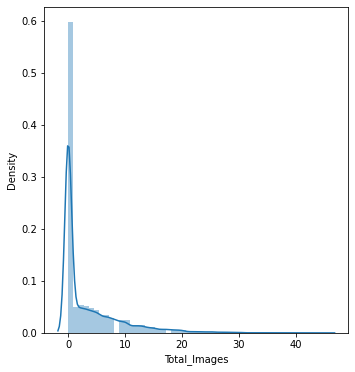

In [110]:
# Plotting histogram for Total_Images
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Total_Images'])

Inference - Most of the mails have no photo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


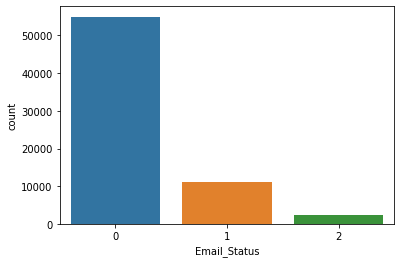

In [111]:
# Plotting histogram for Email Type
sns.countplot(email_df['Email_Status'])

Inference- Very few number of customer are acknowledging the mails. Some customers are also reading the mails which is good for campaign.

([<matplotlib.patches.Wedge at 0x7f5ab69cf610>,
 [Text(-0.8975404408883408, 0.6359411584179488, '0'),
  Text(0.8978020017290247, -0.7962107545690126, '1'),
  Text(1.19286980973148, -0.13062012490877054, '2')],
 [Text(-0.48956751321182224, 0.34687699550069934, '80.38%'),
  Text(0.523717834341931, -0.46445627349859064, '16.15%'),
  Text(0.6958407223433632, -0.07619507286344948, '3.47%')])

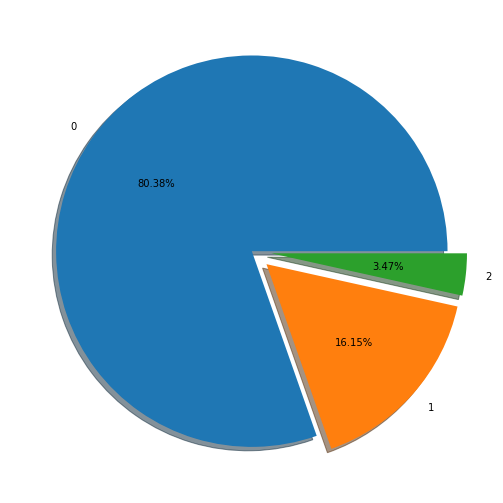

In [112]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (12,9))
plt.pie(email_df['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)

We have multiclass dependent variable and from pie chart we can see status has 80.4% data so we can conclude our data is imbalanced.


###Unique Values

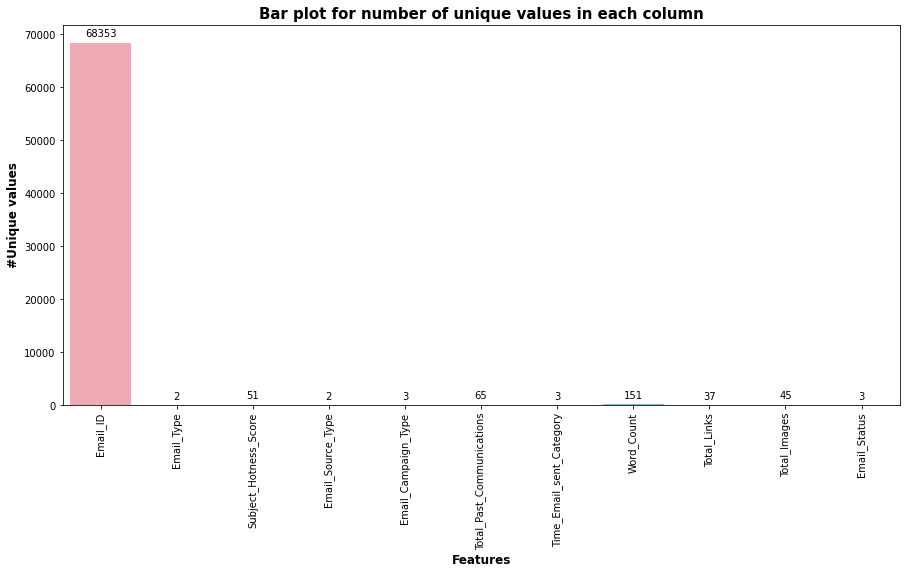

In [113]:
#Plotting unique values in each feature
unique_df = pd.DataFrame()
unique_df['Features'] = email_df.columns
unique=[]
for i in email_df.columns:
    unique.append(email_df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

###**Handling Outliers**

In [114]:
#Extracting the numerical features
numerical_columns=list(email_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [115]:
#Extracting the discrete variables from feature
discrete = []
for var in numerical_features:
    if len(email_df[var].unique())<20:
        print(var, ' values: ', email_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Email_Type  values:  [1 2]
Email_Source_Type  values:  [2 1]
Email_Campaign_Type  values:  [2 3 1]
Time_Email_sent_Category  values:  [1 2 3]
Email_Status  values:  [0 1 2]
There are 5 discrete variables


In [116]:
#Extracting the continous variables from features
continuous = [var for var in numerical_features if var not in discrete and var not in ['Id']]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


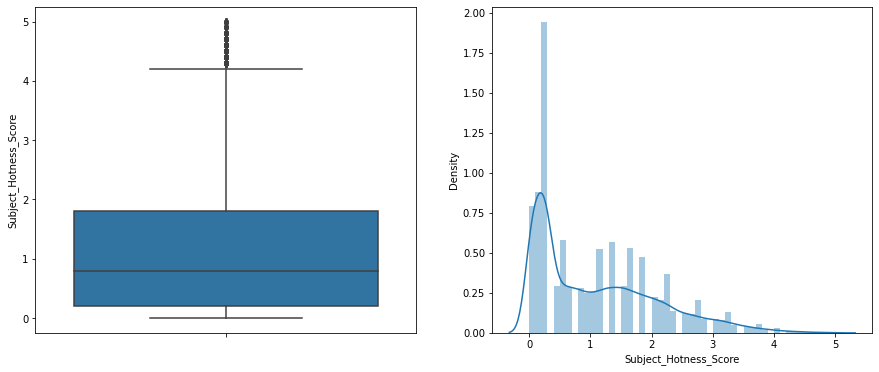

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


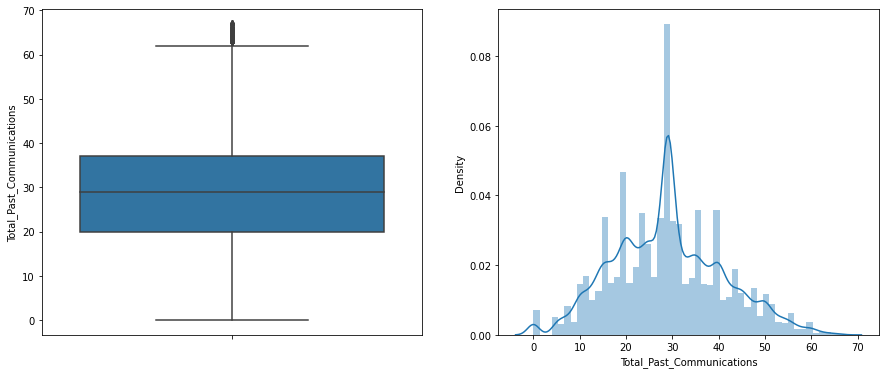

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


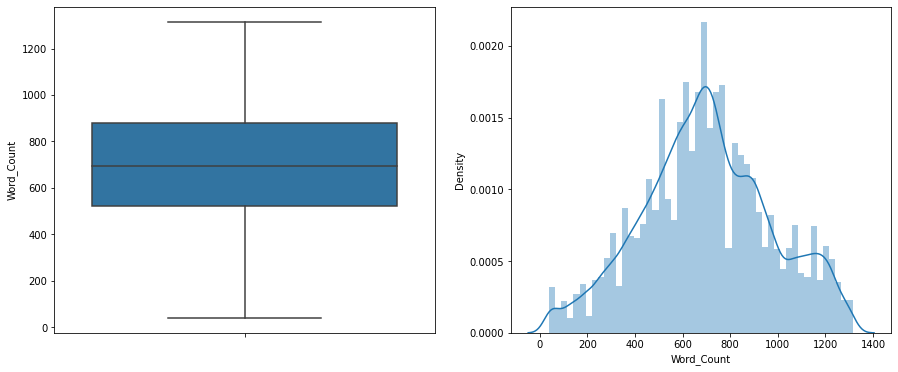

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


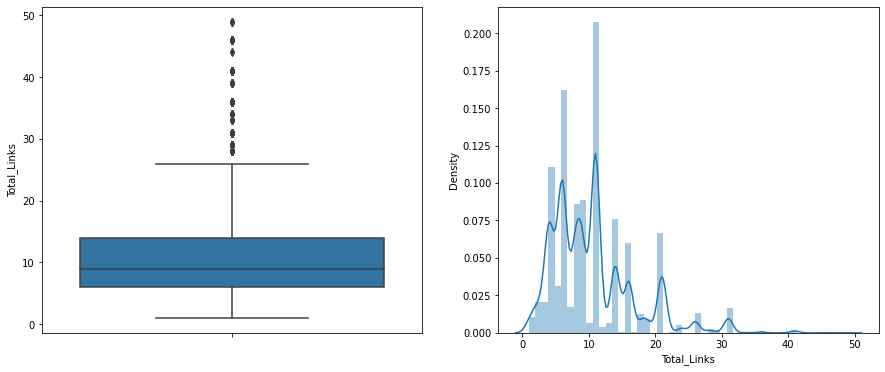

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


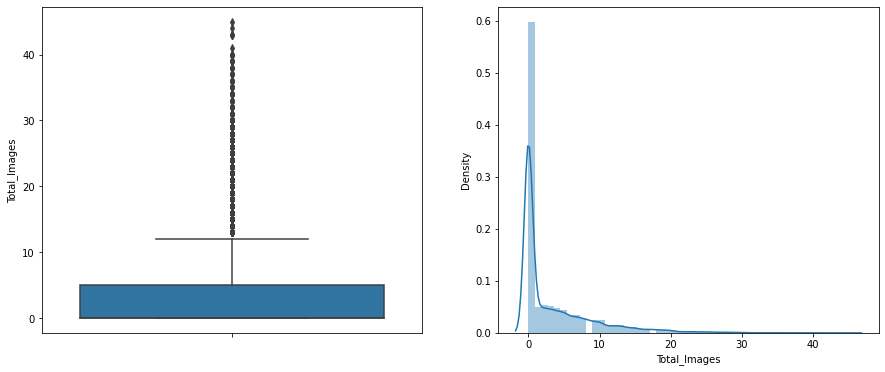

In [117]:
#plotting the outliers boxplot and spread of variance in features
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=email_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(email_df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

###From the above plots we can say that we have some outliers.


1.   Subject Hotness Score
2.   Past communications

1.   Total Image
2.   Total Link





In [118]:
#Creating the temporary dataframe
temparary_df = email_df[['Email_Status','Subject_Hotness_Score','Total_Links','Total_Images','Total_Past_Communications']]

In [119]:
temparary_df['Email_Status'] = temparary_df.loc[temparary_df.index, 'Email_Status'].copy()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


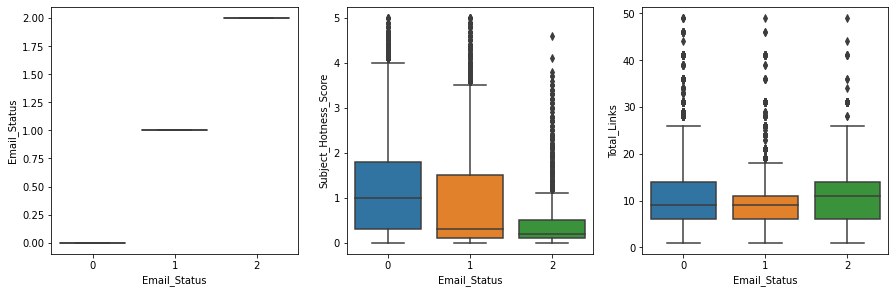

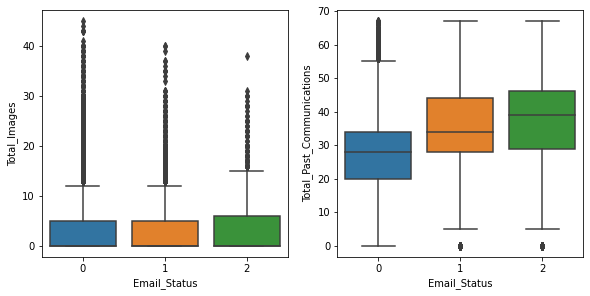

In [120]:
#plotiing outliers of features present w.r.t the status feature
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(temparary_df.columns):
    if ix <= 3:
        if c != 'status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=temparary_df, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

We plot the number of outliers with respect to the individual classes of our target variable.As we know our dataset imbalanced so removing outliers will affect on minority class so we will keep the outliers and we will use machine learning models which are robust to outliers.
